# Do the following on titanic dataset.
1. Load the dataset into python environment
2. Make ‘PassengerId’ as the index column
3. Check the basic details of the dataset
4. Fill in all the missing values present in all the columns in the dataset
5. Check and handle outliers in at least 3 columns in the dataset
6. Do min max scaling on the feature set (Take ‘Survived’ as target)

# 1. Load the dataset into python environment

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titanic_data=pd.read_csv(r"C:\Users\HP\Downloads\titanic_dataset.csv")

In [3]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


# 2. Make ‘PassengerId’ as the index column

In [5]:
titanic_data.set_index('PassengerId',inplace=True)

In [6]:
titanic_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 3. Check the basic details of the dataset

In [7]:
titanic_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
titanic_data.shape

(891, 11)

There are 891 rows and 11 columns in the dataset

In [9]:
titanic_data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

From the above we can understand that there are null values in the column of Age,Cabin and Embarked

In [10]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [11]:
titanic_data.describe(include='all')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"Gronnestad, Mr. Daniel Danielsen",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


# 4. Fill in all the missing values present in all the columns in the dataset

In [12]:
titanic_data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

From the above we can understand that there are null values in the column of Age,Cabin and Embarked.So we need to fill in all the missing values present in this three columns or to drop the column which contains null values

In [13]:
titanic_data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [14]:
# fill null values of column of Age
titanic_data['Age']=titanic_data['Age'].fillna(titanic_data['Age'].median())

In [15]:
titanic_data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [16]:
# drop column with missing values
titanic_data=titanic_data.drop('Cabin',axis=1)

In [17]:
titanic_data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    2
dtype: int64

In [18]:
# fill null values of column of Embarked
titanic_data['Embarked']=titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0])

In [19]:
titanic_data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

Finally we remove or fill all null values in the given dataset.Now there are any null values in the dataset

# 5. Check and handle outliers in at least 3 columns in the dataset

# Fare Column

Text(0.5, 1.0, 'Box plot of Fare')

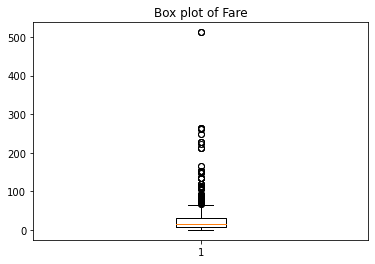

In [20]:
# check outliers of column of Fare
plt.boxplot(titanic_data['Fare'])
plt.title('Box plot of Fare')

In [21]:
Q1=np.percentile(titanic_data['Fare'],25,interpolation='midpoint')
Q2=np.percentile(titanic_data['Fare'],50,interpolation='midpoint')
Q3=np.percentile(titanic_data['Fare'],75,interpolation='midpoint')

In [22]:
print(Q1)
print(Q2)
print(Q3)

7.9104
14.4542
31.0


In [23]:
IQR=Q3-Q1
IQR

23.0896

In [24]:
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR

In [25]:
print(low_lim)
print(up_lim)

-26.724
65.6344


In [26]:
outlier=[]
for x in titanic_data['Fare']:
    if x>up_lim or x<low_lim:
        outlier.append(x)

In [27]:
outlier

[71.2833,
 263.0,
 146.5208,
 82.1708,
 76.7292,
 80.0,
 83.475,
 73.5,
 263.0,
 77.2875,
 247.5208,
 73.5,
 77.2875,
 79.2,
 66.6,
 69.55,
 69.55,
 146.5208,
 69.55,
 113.275,
 76.2917,
 90.0,
 83.475,
 90.0,
 79.2,
 86.5,
 512.3292,
 79.65,
 153.4625,
 135.6333,
 77.9583,
 78.85,
 91.0792,
 151.55,
 247.5208,
 151.55,
 110.8833,
 108.9,
 83.1583,
 262.375,
 164.8667,
 134.5,
 69.55,
 135.6333,
 153.4625,
 133.65,
 66.6,
 134.5,
 263.0,
 75.25,
 69.3,
 135.6333,
 82.1708,
 211.5,
 227.525,
 73.5,
 120.0,
 113.275,
 90.0,
 120.0,
 263.0,
 81.8583,
 89.1042,
 91.0792,
 90.0,
 78.2667,
 151.55,
 86.5,
 108.9,
 93.5,
 221.7792,
 106.425,
 71.0,
 106.425,
 110.8833,
 227.525,
 79.65,
 110.8833,
 79.65,
 79.2,
 78.2667,
 153.4625,
 77.9583,
 69.3,
 76.7292,
 73.5,
 113.275,
 133.65,
 73.5,
 512.3292,
 76.7292,
 211.3375,
 110.8833,
 227.525,
 151.55,
 227.525,
 211.3375,
 512.3292,
 78.85,
 262.375,
 71.0,
 86.5,
 120.0,
 77.9583,
 211.3375,
 79.2,
 69.55,
 120.0,
 93.5,
 80.0,
 83.1583,
 6

The above are the outliers in the column of Fare.So we need to remove this outliers from Fare column

In [28]:
# Handle outliers of Fare column
ind1=titanic_data['Fare']>up_lim
titanic_data.loc[ind1].index

Int64Index([  2,  28,  32,  35,  53,  62,  63,  73,  89, 103,
            ...
            793, 803, 821, 830, 836, 847, 850, 857, 864, 880],
           dtype='int64', name='PassengerId', length=116)

In [29]:
titanic_data=titanic_data.drop(titanic_data.loc[ind1].index)

Text(0.5, 1.0, 'Box plot of Fare')

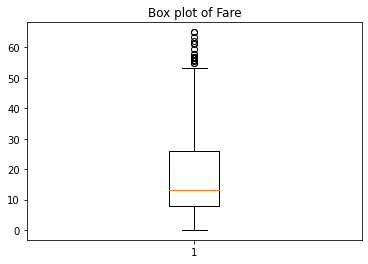

In [30]:
plt.boxplot(titanic_data['Fare'])
plt.title('Box plot of Fare')

The above shows boxplot after the treatment of outliers.we compare the two boxplots with the one before and after the treatment of the outliers, we still observed that there are a few extreme values that may be newly generated.So we can use median or mean value to replace the newly generated extreme values

In [31]:
titanic_data.shape

(775, 10)

# Age column

Text(0.5, 1.0, 'Box plot of Age')

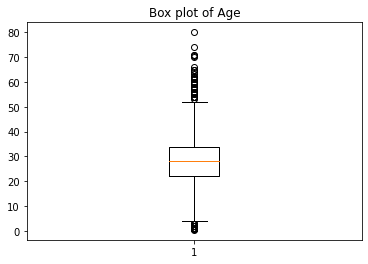

In [32]:
# Check outliers of Age column
plt.boxplot(titanic_data['Age'])
plt.title('Box plot of Age')

In [33]:
Q1=np.percentile(titanic_data['Age'],25,interpolation='midpoint')
Q2=np.percentile(titanic_data['Age'],50,interpolation='midpoint')
Q3=np.percentile(titanic_data['Age'],75,interpolation='midpoint')

In [34]:
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR

In [35]:
print(low_lim)
print(up_lim)

4.0
52.0


In [36]:
outlier=[]
for x in titanic_data['Age']:
    if x>up_lim or x<low_lim:
        outlier.append(x)

In [37]:
outlier

[54.0,
 2.0,
 58.0,
 55.0,
 2.0,
 66.0,
 3.0,
 65.0,
 0.83,
 59.0,
 71.0,
 70.5,
 2.0,
 55.5,
 1.0,
 61.0,
 1.0,
 56.0,
 1.0,
 3.0,
 2.0,
 59.0,
 54.0,
 62.0,
 3.0,
 65.0,
 54.0,
 61.0,
 2.0,
 3.0,
 3.0,
 1.0,
 1.0,
 3.0,
 65.0,
 56.0,
 0.75,
 2.0,
 63.0,
 58.0,
 55.0,
 71.0,
 54.0,
 2.0,
 64.0,
 62.0,
 62.0,
 53.0,
 54.0,
 61.0,
 57.0,
 80.0,
 2.0,
 0.75,
 56.0,
 70.0,
 60.0,
 60.0,
 0.67,
 57.0,
 54.0,
 1.0,
 0.42,
 2.0,
 1.0,
 0.83,
 74.0]

The above are the outliers in the column of Age.So we need to remove this outliers from Age column

In [38]:
# Handle outliers of Age column
index=titanic_data['Age'][(titanic_data['Age']>up_lim)|(titanic_data['Fare']<low_lim)].index

In [39]:
index

Int64Index([  7,  12,  16,  34,  55,  95,  97, 117, 153, 171, 175, 180, 233,
            250, 253, 264, 272, 278, 281, 303, 318, 327, 414, 457, 467, 468,
            482, 484, 488, 493, 494, 514, 546, 556, 571, 572, 583, 598, 626,
            627, 631, 634, 648, 673, 675, 685, 695, 733, 773, 775, 807, 816,
            823, 852],
           dtype='int64', name='PassengerId')

In [40]:
titanic_data=titanic_data.drop(index)

Text(0.5, 1.0, 'Box plot of Age')

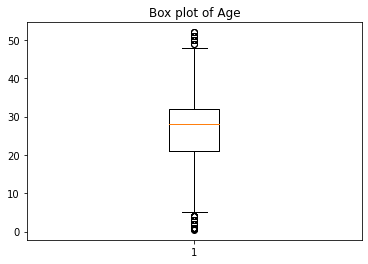

In [41]:
plt.boxplot(titanic_data['Age'])
plt.title('Box plot of Age')

The above shows boxplot after the treatment of outliers.we compare the two boxplots with the one before and after the treatment of the outliers, we still observed that there are a few extreme values that may be newly generated.So we can use median or mean value to replace the newly generated extreme values

In [42]:
titanic_data.shape

(721, 10)

# SibSp Column

Text(0.5, 1.0, 'Box plot of SibSp')

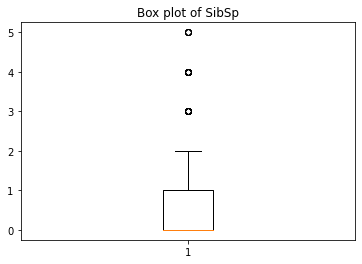

In [43]:
#check outliers of SibSp column
plt.boxplot(titanic_data['SibSp'])
plt.title('Box plot of SibSp')

In [44]:
Q1=np.percentile(titanic_data['SibSp'],25,interpolation='midpoint')
Q2=np.percentile(titanic_data['SibSp'],50,interpolation='midpoint')
Q3=np.percentile(titanic_data['SibSp'],75,interpolation='midpoint')
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR

In [45]:
print(low_lim)
print(up_lim)

-1.5
2.5


In [46]:
outlier=[]
for x in titanic_data['SibSp']:
    if x>up_lim or x<low_lim:
        outlier.append(x)

In [47]:
outlier

[3,
 4,
 3,
 4,
 5,
 3,
 4,
 5,
 3,
 4,
 4,
 4,
 3,
 4,
 3,
 4,
 4,
 4,
 4,
 3,
 5,
 3,
 5,
 3,
 4,
 4,
 3,
 3,
 5,
 4,
 3,
 4,
 4,
 3,
 4,
 4]

In [48]:
# Handle outliers of SibSp column
ind1=titanic_data['SibSp']>up_lim
titanic_data.loc[ind1].index

Int64Index([  8,  17,  25,  51,  60,  64,  69,  72,  86, 120, 165, 172, 177,
            183, 230, 234, 262, 267, 279, 375, 387, 410, 481, 486, 542, 543,
            635, 643, 684, 687, 727, 788, 814, 820, 825, 851],
           dtype='int64', name='PassengerId')

In [49]:
titanic_data=titanic_data.drop(titanic_data.loc[ind1].index)

Text(0.5, 1.0, 'Box plot of SibSp')

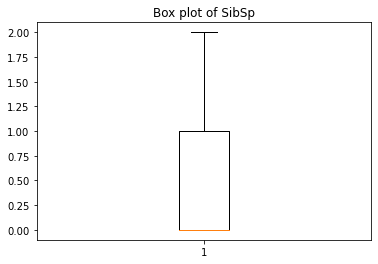

In [50]:
plt.boxplot(titanic_data['SibSp'])
plt.title('Box plot of SibSp')

The above shows boxplot after the treatment of outliers.We removed all outliers in SibSp column

In [51]:
titanic_data.shape

(685, 10)

# 6. Do min max scaling on the feature set (Take ‘Survived’ as target)

In [52]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [53]:
# drop column of name and ticket
titanic_data.drop(['Name','Ticket'],axis=1,inplace=True)

In [54]:
# Label encoding Of Sex
oh=LabelEncoder()
titanic_data.Sex=oh.fit_transform(titanic_data.Sex)

In [55]:
#One Hot encoding
titanic_data=pd.get_dummies(titanic_data)

In [56]:
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,0,0,1
3,1,3,0,26.0,0,0,7.9250,0,0,1
4,1,1,0,35.0,1,0,53.1000,0,0,1
5,0,3,1,35.0,0,0,8.0500,0,0,1
6,0,3,1,28.0,0,0,8.4583,0,1,0


In [57]:
y=titanic_data['Survived']
x=titanic_data.drop('Survived',axis=1)

In [58]:
# MinMax Scaler
min_max=preprocessing.MinMaxScaler(feature_range=(0,1))
X=min_max.fit_transform(x)

In [59]:
X=pd.DataFrame(X)

In [60]:
X.describe()

,0,1,2,3,4,5,6,7,8
count,685.000000,685.000000,685.000000,685.000000,685.000000,685.000000,685.000000,685.000000,685.000000
mean,0.756204,0.677372,0.530946,0.143796,0.050365,0.214462,0.159124,0.099270,0.741606
std,0.355175,0.467823,0.194193,0.256740,0.128476,0.214843,0.366059,0.299243,0.438072
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.000000,0.418379,0.000000,0.000000,0.063674,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.534703,0.000000,0.000000,0.122771,0.000000,0.000000,1.000000
75%,1.000000,1.000000,0.612253,0.500000,0.000000,0.330191,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


The above shows minmax scaling of feature set(take survived as target)

In [61]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=42,test_size=0.25)

In [62]:
from sklearn import linear_model

In [63]:
lr=linear_model.LinearRegression()
model=lr.fit(x_train,y_train)
predictions=model.predict(x_test)

In [64]:
print(y_test)

PassengerId
396    0
719    0
283    0
433    1
210    1
      ..
842    0
209    1
782    1
786    0
564    0
Name: Survived, Length: 172, dtype: int64


In [66]:
print(predictions)

[ 0.15646448  0.2112917   0.21916017  0.64998192  0.48639548  0.10245551
  0.14276814  0.138301    0.14418641  0.63678291  1.00378021 -0.00652539
  0.50959699  0.29543479  0.60237282  0.89234472  0.71928195  0.12851727
  0.37566175  0.10187389  0.00200115  0.62094388  0.33645054  0.60478018
  0.05342458  0.10245551  0.61058844  0.12093696  0.16616829  0.16095184
  0.25002608  1.13174161  0.49286016  0.82341683 -0.02117841  0.12057903
  0.44740903  0.19257094  0.41433936  0.76871419  0.36875392  0.14673245
  0.38975841  0.6779358   0.11017927  0.40094716  0.16093162  0.21804639
  0.35785548  0.16416133 -0.04271177  0.17387753  0.84648079  0.12136142
  0.16093162  0.20232753  0.10245551  0.01532953 -0.07320692  0.58911725
  0.13471019  0.36042995  1.00402031 -0.05119167  0.29609999  0.10245551
  0.16095184  0.17728318  0.62251389  0.18419118  0.5947355   0.09964708
  0.06069828  0.49801523  0.50923589  0.19864348  0.10109753  0.32234895
  0.76213448  0.49446374  0.17500294  0.72321795  0

In [67]:
from sklearn.metrics import mean_squared_error

In [68]:
print(mean_squared_error(y_test,predictions))

0.12077639021602495
